Training Code

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [9]:
import os

# Get the current working directory
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: C:\Kuliah\7Sem\Deep Learning\UAS


In [10]:
# Resolve the full path to the ratings.csv file
ratings_path = os.path.abspath('../UAS/dataset/ratings.csv')
print("Resolved Path:", ratings_path)

Resolved Path: C:\Kuliah\7Sem\Deep Learning\UAS\dataset\ratings.csv


In [14]:
# Reading the ratings data
ratings = pd.read_csv(ratings_path)

ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']  # Assigning column names

# Display the dataset shape
print("Dataset shape:", ratings.shape)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(ratings.head())

Dataset shape: (100004, 4)
First 5 rows of the dataset:
   UserID  MovieID  Rating   Timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


In [15]:
# Pivoting the data to get it at a user level
ratings_pivot = pd.pivot_table(ratings[['UserID', 'MovieID', 'Rating']],
                               values='Rating', index='UserID', columns='MovieID').fillna(0)

# Display the shape of the pivot table
print("Pivot table shape:", ratings_pivot.shape)

# Display the first 5 rows of the pivot table
print("First 5 rows of the pivot table:")
print(ratings_pivot.head())

Pivot table shape: (671, 9066)
First 5 rows of the pivot table:
MovieID  1       2       3       4       5       6       7       8       \
UserID                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0   

MovieID  9       10      ...  161084  161155  161594  161830  161918  161944  \
UserID                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     4.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4         

In [16]:
# Splitting into train and test sets
X_train, X_test = train_test_split(ratings_pivot, train_size=0.8)

# Converting to NumPy arrays
X_train = X_train.values
X_test = X_test.values

In [28]:
# Building the autoencoder model using Keras layers
n_nodes_inpl = X_train.shape[1]  # Input layer size
n_nodes_hl1 = 256  # Number of hidden layer nodes
n_nodes_outl = n_nodes_inpl  # Output layer size matches input

In [39]:
autoencoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_nodes_inpl,)),
    tf.keras.layers.Dense(n_nodes_hl1, activation='sigmoid'),
    tf.keras.layers.Dense(n_nodes_outl, activation='sigmoid')
])

# Compiling the model
autoencoder.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0000.1),
                    loss='mean_squared_error')

In [40]:
# Training the model
hm_epochs = 500  # Number of epochs
batch_size = 32  # Batch size
history = autoencoder.fit(X_train, X_train,
                          validation_data=(X_test, X_test),
                          epochs=hm_epochs,
                          batch_size=batch_size,
                          verbose=1)

Epoch 1/500
17/17 [==============================] - 1s 19ms/step - loss: 0.4179 - val_loss: 0.4094
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4158 - val_loss: 0.4073
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4137 - val_loss: 0.4052
Epoch 4/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4117 - val_loss: 0.4031
Epoch 5/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4096 - val_loss: 0.4010
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4075 - val_loss: 0.3988
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4053 - val_loss: 0.3966
Epoch 8/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4032 - val_loss: 0.3944
Epoch 9/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4010 - val_loss: 0.3921
Epoch 10/500
17/17 [==============================] - 0s 6ms/step - loss: 0.3987 - val_loss: 0.3898
Epoch 11

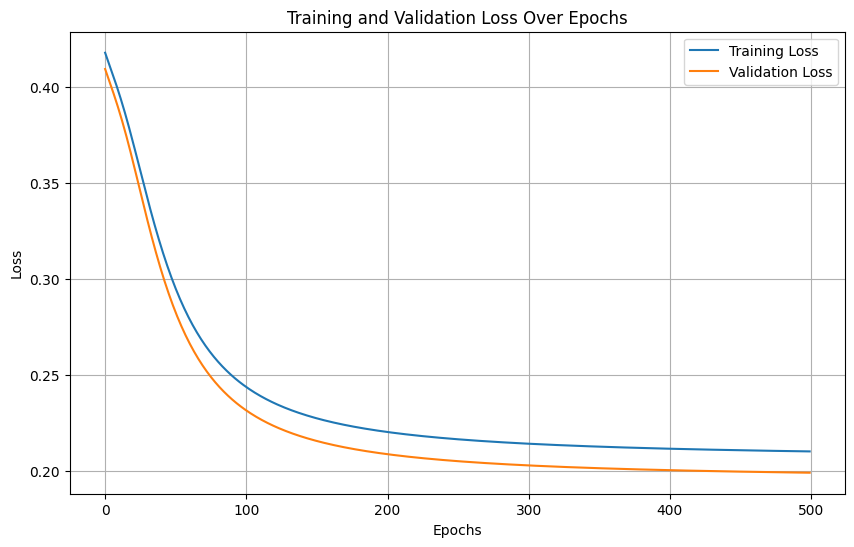

In [41]:
# Drawing the loss graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('loss_graph.png')  # Save the loss graph as a PNG file
plt.show()

In [44]:
# Resolve the full path to the ratings.csv file
model_path = os.path.abspath('../UAS/models/autoencoder_model_256.h5')
print("Resolved Path:", model_path)

Resolved Path: C:\Kuliah\7Sem\Deep Learning\UAS\models\autoencoder_model_256.h5


In [45]:
# Saving the trained model
autoencoder.save(model_path)
print(f"Model saved to {model_path}")

Model saved to C:\Kuliah\7Sem\Deep Learning\UAS\models\autoencoder_model_256.h5


In [46]:
# Evaluating the model
train_predictions = autoencoder.predict(X_train)
test_predictions = autoencoder.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [47]:
print('MSE train:', MSE(X_train, train_predictions))
print('MSE test:', MSE(X_test, test_predictions))

# Making predictions for a sample user
sample_user = X_test[99].reshape(1, -1)
sample_user_pred = autoencoder.predict(sample_user)
print("Predicted Ratings for Sample User:", sample_user_pred)

MSE train: 0.21007977884172369
MSE test: 0.1989765875349475
1/1 [==============================] - 0s 15ms/step
Predicted Ratings for Sample User: [[0.9812602  0.6040678  0.288692   ... 0.06064798 0.05986591 0.0612134 ]]


Testing Code

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [49]:
import os

# Get the current working directory
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: C:\Kuliah\7Sem\Deep Learning\UAS


In [67]:
# Resolve the full path to the ratings.csv file
model_path = os.path.abspath('../UAS/autoencoder_model_256.h5')
print("Resolved Path:", model_path)

Resolved Path: C:\Kuliah\7Sem\Deep Learning\UAS\autoencoder_model_256.h5


In [68]:
# Load the trained autoencoder model
autoencoder = tf.keras.models.load_model(model_path)

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2321152   
                                                                 
 dense_9 (Dense)             (None, 9066)              2329962   
                                                                 
Total params: 4,651,114
Trainable params: 4,651,114
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Resolve the full path to the ratings.csv file
ratings_path = os.path.abspath('../UAS/dataset/ratings.csv')
print("Ratings Path:", ratings_path)

movies_path = os.path.abspath('../UAS/dataset/movies.csv')
print("Movies Path:", movies_path)

Ratings Path: C:\Kuliah\7Sem\Deep Learning\UAS\dataset\ratings.csv
Movies Path: C:\Kuliah\7Sem\Deep Learning\UAS\dataset\movies.csv


In [70]:
# Load the ratings and movie metadata
ratings = pd.read_csv(ratings_path)
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

# Load the movies.dat file with proper encoding
movies = pd.read_csv(movies_path, encoding='ISO-8859-1')
movies.columns = ['MovieID', 'Title', 'Genres']

In [71]:
# Create the user-movie ratings pivot table
ratings_pivot = pd.pivot_table(ratings[['UserID', 'MovieID', 'Rating']],
                               values='Rating', index='UserID', columns='MovieID').fillna(0)

# Map movie IDs to their indices
movie_id_to_index = {movie_id: index for index, movie_id in enumerate(ratings_pivot.columns)}
index_to_movie_id = {index: movie_id for movie_id, index in movie_id_to_index.items()}

In [72]:
# Choose a user (example: user ID 99)
user_id = 99
if user_id not in ratings_pivot.index:
    raise ValueError(f"User {user_id} does not exist in the dataset.")

user_ratings = ratings_pivot.loc[user_id].values.reshape(1, -1)

In [73]:
# Get the predicted ratings
predicted_ratings = autoencoder.predict(user_ratings).flatten()

# Exclude movies already rated by the user
already_rated = user_ratings.flatten() > 0
recommendation_scores = np.where(already_rated, -np.inf, predicted_ratings)

1/1 [==============================] - 0s 79ms/step


In [76]:
# Get the top 10 movie recommendations
top_movie_indices = np.argsort(recommendation_scores)[::-1][:50]  # Sort descending and get top 10
recommended_movie_ids = [index_to_movie_id[i] for i in top_movie_indices]

# Map movie IDs to titles and ensure the correct order
recommended_movies = movies[movies['MovieID'].isin(recommended_movie_ids)]
recommended_movies = recommended_movies.set_index('MovieID').loc[recommended_movie_ids].reset_index()

# Display the recommendations
print(f"Top 50 recommended movies for user {user_id}:")
print(recommended_movies[['MovieID', 'Title']])
print(recommended_movie_ids)

Top 50 recommended movies for user 99:
    MovieID                                              Title
0       260          Star Wars: Episode IV - A New Hope (1977)
1      2571                                 Matrix, The (1999)
2      1196  Star Wars: Episode V - The Empire Strikes Back...
3       589                  Terminator 2: Judgment Day (1991)
4      1198  Raiders of the Lost Ark (Indiana Jones and the...
5      1270                          Back to the Future (1985)
6       858                              Godfather, The (1972)
7        32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
8       780               Independence Day (a.k.a. ID4) (1996)
9       150                                   Apollo 13 (1995)
10     2762                            Sixth Sense, The (1999)
11      590                          Dances with Wolves (1990)
12      364                              Lion King, The (1994)
13     7153  Lord of the Rings: The Return of the King, The...
14     1197     

In [59]:
# Convert predictions and inputs to pandas DataFrames for readability
input_df = pd.DataFrame(user_ratings.flatten(), index=ratings_pivot.columns, columns=['User Rating'])
output_df = pd.DataFrame(predicted_ratings.flatten(), index=ratings_pivot.columns, columns=['Predicted Rating'])

# Combine input and output for comparison
comparison_df = pd.concat([input_df, output_df], axis=1)

# Display a sample of the data (e.g., 20 movies)
print("Input (User Ratings) and Output (Predicted Ratings):")
print(comparison_df.head(20))

Input (User Ratings) and Output (Predicted Ratings):
         User Rating  Predicted Rating
MovieID                               
1                4.0          0.981248
2                2.0          0.604030
3                0.0          0.288725
4                0.0          0.075270
5                0.0          0.287178
6                0.0          0.667227
7                0.0          0.283161
8                0.0          0.069651
9                0.0          0.106756
10               0.0          0.685234
11               0.0          0.511343
12               0.0          0.085802
13               0.0          0.078490
14               0.0          0.167317
15               0.0          0.067886
16               0.0          0.584391
17               3.0          0.558511
18               0.0          0.142020
19               0.0          0.360063
20               0.0          0.078262


In [60]:
# Check the range of user ratings
print("Min and Max User Ratings in the Dataset:")
print(ratings['Rating'].min(), ratings['Rating'].max())

# Inspect the model's weights (to check for potential bias)
for layer in autoencoder.layers:
    print(f"Layer {layer.name}: Weights")
    print(layer.get_weights())

# Compare predictions for a user with the global average rating
global_avg_rating = ratings.groupby('MovieID')['Rating'].mean()
comparison_df['Global Avg Rating'] = global_avg_rating
print("Comparison with Global Average Ratings:")
print(comparison_df.head(20))

Min and Max User Ratings in the Dataset:
0.5 5.0
Layer dense_8: Weights
[array([[ 0.03378795,  0.04698358,  0.05254518, ...,  0.05280644,
         0.03760739,  0.05200407],
       [-0.00505168,  0.03571454, -0.00611426, ...,  0.01558551,
         0.00975331,  0.00820019],
       [ 0.02683329,  0.00645228,  0.03042027, ...,  0.02227442,
         0.01176063,  0.00466611],
       ...,
       [-0.02222252, -0.02249831,  0.00575204, ...,  0.00639435,
         0.00968293,  0.01774389],
       [ 0.00391812,  0.00149029, -0.00549989, ...,  0.00866123,
        -0.00580883,  0.00016158],
       [ 0.01982922, -0.00892479, -0.00582509, ..., -0.01164009,
        -0.00277312, -0.01423187]], dtype=float32), array([0.07819071, 0.08109808, 0.07276588, 0.07711283, 0.08126357,
       0.07542145, 0.07080019, 0.076153  , 0.07926426, 0.07957023,
       0.075789  , 0.07668034, 0.07808578, 0.07543019, 0.07747997,
       0.07745964, 0.07555629, 0.07981478, 0.07732629, 0.07810747,
       0.07512171, 0.07731997,

In [61]:
# Combine input and output for comparison
comparison_df = pd.DataFrame({
    'User Rating': user_ratings.flatten(),
    'Predicted Rating': predicted_ratings.flatten(),
    'Global Avg Rating': global_avg_rating.values
}, index=ratings_pivot.columns)

# Filter for movies that the user has already rated (User Rating > 0)
rated_movies = comparison_df[comparison_df['User Rating'] > 0]

# Display the predicted ratings for movies the user has already rated
print("Predicted Ratings for Movies the User Has Already Rated:")
print(rated_movies)

Predicted Ratings for Movies the User Has Already Rated:
         User Rating  Predicted Rating  Global Avg Rating
MovieID                                                  
1                4.0          0.981248           3.872470
2                2.0          0.604030           3.401869
17               3.0          0.558511           3.924419
28               3.0          0.118185           4.083333
39               4.0          0.706371           3.550000
...              ...               ...                ...
4995             5.0          0.669334           3.951754
5013             4.0          0.139601           3.362069
5349             4.0          0.742210           3.522388
5952             4.0          0.947936           4.061170
5991             5.0          0.277003           3.647059

[188 rows x 3 columns]


In [62]:
import pandas as pd
import numpy as np

# Combine the user's actual ratings and predicted ratings
comparison_df = pd.DataFrame({
    'User Rating': user_ratings.flatten(),
    'Predicted Rating': predicted_ratings.flatten(),
    'MovieID': ratings_pivot.columns
}).set_index('MovieID')

# Filter the movies rated by the user
rated_movies = comparison_df[comparison_df['User Rating'] > 0]
rated_movies = rated_movies.sort_values(by='User Rating', ascending=False)  # Sort by highest user rating

# Get the top 10 recommended movies
top_recommended_indices = np.argsort(recommendation_scores)[::-1][:10]
top_recommended_movie_ids = [index_to_movie_id[i] for i in top_recommended_indices]
recommended_movies = movies[movies['MovieID'].isin(top_recommended_movie_ids)]

# Merge rated movies with movie metadata (e.g., genres, title)
rated_movies_with_metadata = rated_movies.merge(movies, on='MovieID', how='left')
recommended_movies_with_metadata = recommended_movies

# Compare user-rated movies with top recommendations
print("Movies Rated by User:")
print(rated_movies_with_metadata[['MovieID', 'Title', 'Genres', 'User Rating']])

print("\nTop 10 Recommended Movies:")
print(recommended_movies_with_metadata[['MovieID', 'Title', 'Genres']])

# Check for genre similarity or other attributes
rated_genres = set("|".join(rated_movies_with_metadata['Genres']).split("|"))
recommended_genres = set("|".join(recommended_movies_with_metadata['Genres']).split("|"))

print("\nGenres in Movies Rated by User:", rated_genres)
print("Genres in Recommended Movies:", recommended_genres)
print("Common Genres:", rated_genres.intersection(recommended_genres))

Movies Rated by User:
     MovieID                                              Title  \
0       1619                        Seven Years in Tibet (1997)   
1        595                        Beauty and the Beast (1991)   
2        720  Wallace & Gromit: The Best of Aardman Animatio...   
3        903                                     Vertigo (1958)   
4        912                                  Casablanca (1942)   
..       ...                                                ...   
183     1591                                       Spawn (1997)   
184     1017                       Swiss Family Robinson (1960)   
185     1676                           Starship Troopers (1997)   
186     3578                                   Gladiator (2000)   
187     2136                        Nutty Professor, The (1963)   

                                              Genres  User Rating  
0                                Adventure|Drama|War          5.0  
1    Animation|Children|Fantasy|Music

In [63]:
# Calculate the average rating for each movie
movie_avg_ratings = ratings.groupby('MovieID')['Rating'].mean()

# Merge with movie titles
movie_avg_ratings = movie_avg_ratings.reset_index()
movie_avg_ratings = movie_avg_ratings.merge(movies, on='MovieID')

# Sort by average rating and select the top 10
top_movies = movie_avg_ratings.sort_values(by='Rating', ascending=False).head(10)

# Display recommendations
print("Top 10 Popular Movies for New Users:")
print(top_movies[['MovieID', 'Title', 'Rating']])

Top 10 Popular Movies for New Users:
      MovieID                                              Title  Rating
9065   163949  The Beatles: Eight Days a Week - The Touring Y...     5.0
7297    71180                               Padre padrone (1977)     5.0
6629    51471                               Amazing Grace (2006)     5.0
6662    52617       Woman on the Beach (Haebyeonui yeoin) (2006)     5.0
6704    53887                                O Lucky Man! (1973)     5.0
6717    54251                                Dorian Blues (2004)     5.0
6726    54328           My Best Friend (Mon meilleur ami) (2006)     5.0
6785    55555  Edge of Heaven, The (Auf der anderen Seite) (2...     5.0
6836    56869                  Drained (O cheiro do Ralo) (2006)     5.0
6843    57038  To the Left of the Father (Lavoura Arcaica) (2...     5.0
